In [15]:
# Importing necessary libraries and loading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("house Prediction Data Set.csv", sep = r"\s+", engine = "python", header = None)

df.columns = ["crime", "zone", "industry", "river", "nox", "rooms", "age", "distance", "radial", "tax", "pupil_teacher", "black", "lower_stat", "median"]

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (506, 14)


,crime,zone,industry,river,nox,rooms,age,distance,radial,tax,pupil_teacher,black,lower_stat,median
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [19]:
# Inspecting data
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())
print("\nSummary statistics:")
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   crime          506 non-null    float64
 1   zone           506 non-null    float64
 2   industry       506 non-null    float64
 3   river          506 non-null    int64  
 4   nox            506 non-null    float64
 5   rooms          506 non-null    float64
 6   age            506 non-null    float64
 7   distance       506 non-null    float64
 8   radial         506 non-null    int64  
 9   tax            506 non-null    float64
 10  pupil_teacher  506 non-null    float64
 11  black          506 non-null    float64
 12  lower_stat     506 non-null    float64
 13  median         506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB

Missing values per column:
crime            0
zone             0
industry         0
river            0
nox              0
rooms           

,crime,zone,industry,river,nox,rooms,age,distance,radial,tax,pupil_teacher,black,lower_stat,median
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


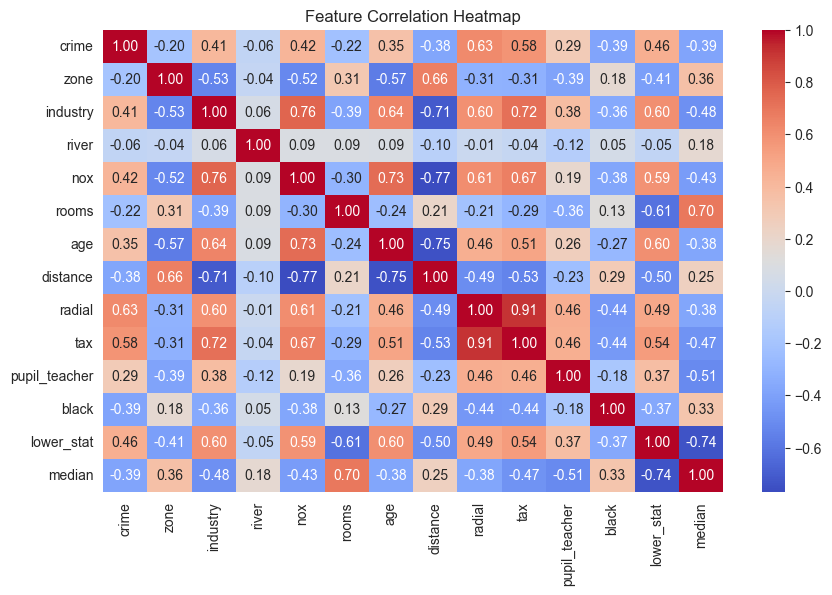

In [21]:
# Correlation heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [26]:
# Splitting feature and target variables
X = df.drop("median", axis = 1)
y = df["median"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (506, 13)
Target shape: (506,)


In [25]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 404
Testing samples: 102


In [27]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Training models
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [29]:
# Evaluating models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

models = {
    "Linear Regression" : y_pred_lr,
    "Decision Tree" : y_pred_dt,
    "Random Forest" : y_pred_rf
}

for name, preds in models.items():
    mse, rmse, r2 = evaluate_model(y_test, preds)
    print(f"\n ==== {name} ====")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.3f}")


 ==== Linear Regression ====
MSE: 24.29
RMSE: 4.93
R-squared: 0.669

 ==== Decision Tree ====
MSE: 10.42
RMSE: 3.23
R-squared: 0.858

 ==== Random Forest ====
MSE: 7.90
RMSE: 2.81
R-squared: 0.892


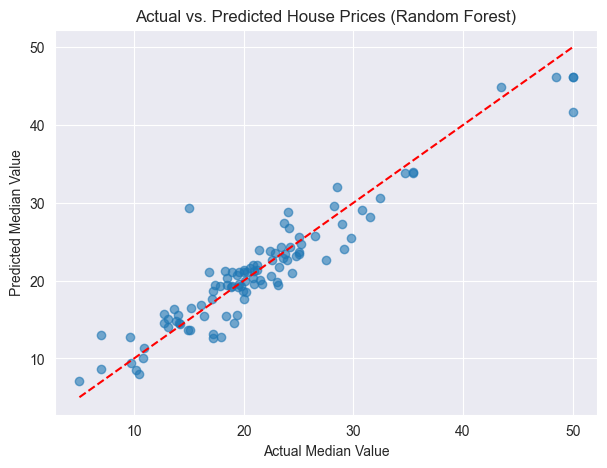

In [31]:
# Visualizing predictions
plt.figure(figsize = (7, 5))
plt.scatter(y_test, y_pred_rf, alpha = 0.6)
plt.xlabel("Actual Median Value")
plt.ylabel("Predicted Median Value")
plt.title("Actual vs. Predicted House Prices (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()